# Exercício - Mini Projeto de Análise de Dados - Hashtag Treinamentos

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

# 1. Importando bases

In [40]:
import pandas as pd

clientes = pd.read_csv("CadastroClientes.csv", sep=';', decimal = ',', encoding='utf-8')
funcionarios = pd.read_csv("CadastroFuncionarios.csv", sep=';', decimal = ',', encoding='utf-8')
servicos = pd.read_excel("BaseServiçosPrestados.xlsx", decimal = ',')

# 2. Visualizando bases para entender com o que estamos trabalhando

In [63]:
clientes.head()
funcionarios.head()
#servicos.head()

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36


# 3. Resolução dos problemas

## 3.1. Valor total da folha salarial

In [42]:
funcionarios['Salario Total'] = funcionarios['Salario Base'] + funcionarios['Impostos'] + funcionarios['Beneficios'] + funcionarios['VT'] + funcionarios['VR']
#funcionarios['Salario Total'] = funcionarios['Salario Total'].replace(0, pd.NA)
#funcionarios['Salario Total'] = funcionarios['Salario Total'].apply(lambda x: f'R$ {x:,.2f}')

funcionarios.head()

folha_salarial_total = funcionarios['Salario Total'].sum()
print(f"Folha salarial total: R$ {folha_salarial_total:,.2f}")

Folha salarial total: R$ 2,717,493.22


## 3.2. Faturamento da empresa

In [47]:
servicos.head()
clientes.head()

faturamentos = servicos[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamentos['Faturamento Total'] = faturamentos['Tempo Total de Contrato (Meses)'] * faturamentos['Valor Contrato Mensal']

faturamento_total = faturamentos['Faturamento Total'].sum()
print(f"Faturamento total: R$ {faturamento_total:,.2f}")

Faturamento total: R$ 5,519,160.00


## 3.3. Percentual de funcionários que já fechou um contrato

In [61]:
total_funcionarios = funcionarios['ID Funcionário'].nunique()
print(f"Total de funcionários: {total_funcionarios}")
print()

fechou_contrato_funcionarios = servicos['ID Funcionário'].nunique()
print(f"Total de funcionários que fecharam contrato: {fechou_contrato_funcionarios}")
print()

percentual_funcionarios = (fechou_contrato_funcionarios / total_funcionarios) * 100
print(f"Percentual de funcionários que fecharam contrato: {percentual_funcionarios:.2f}%")


Total de funcionários: 114

Total de funcionários que fecharam contrato: 99

Percentual de funcionários que fecharam contrato: 86.84%


## 3.4. Total de contratos que cada área da empresa já fechou

<Axes: title={'center': 'Contratos por área'}, xlabel='Área', ylabel='Quantidade de contratos'>

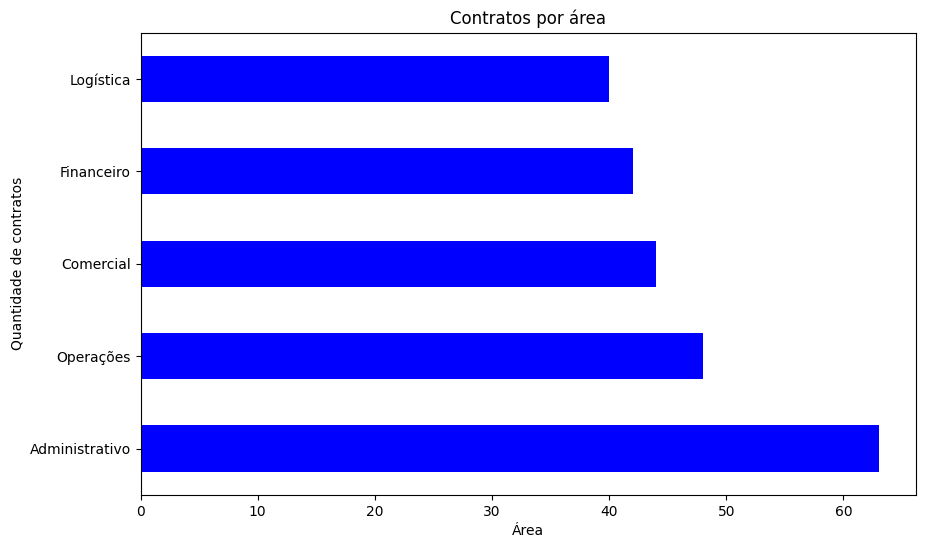

In [81]:
servicos.head()

faturamentos = servicos[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

contratos_por_area = servicos[['ID Funcionário']].merge(funcionarios[['ID Funcionário', 'Area']])

contador_contr_por_area = contratos_por_area['Area'].value_counts()

contador_contr_por_area.plot(kind='barh', title='Contratos por área', xlabel='Área', ylabel='Quantidade de contratos', color='blue', figsize=(10, 6))

#contratos_por_area.head()

## 3.5. Total de funcionários por área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: title={'center': 'Funcionários por área'}, xlabel='Área', ylabel='Quantidade de funcionários'>

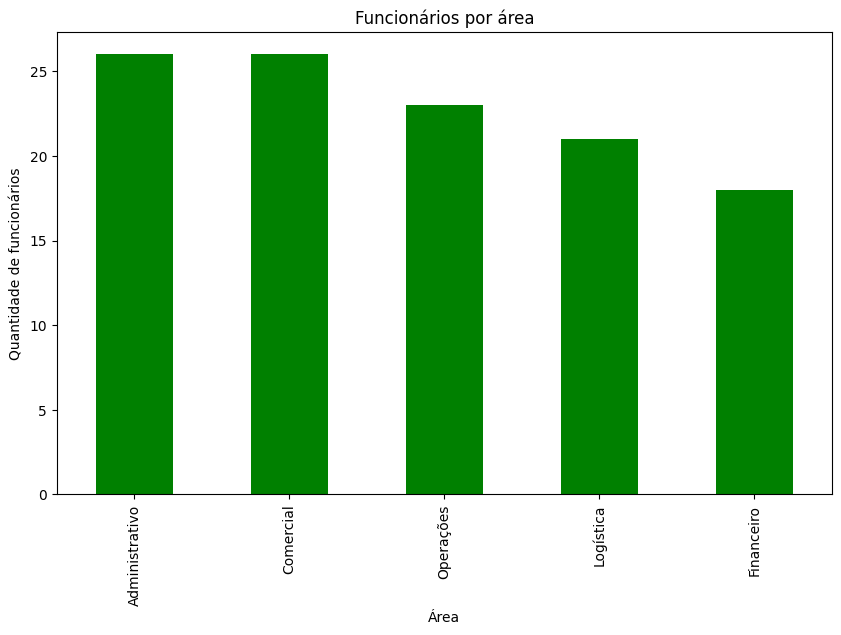

In [88]:
funcionarios_por_area = funcionarios['Area'].value_counts()#('Area').size()#.reset_index(name='Total Funcionários')

print(funcionarios_por_area)

funcionarios_por_area.plot(kind='bar', title='Funcionários por área', xlabel='Área', ylabel='Quantidade de funcionários', color='green', figsize=(10, 6))


## 3.6. Ticket médio mensal dos contratos

In [92]:
clientes.head()

ticket_medio = clientes['Valor Contrato Mensal'].mean()
print(f"Ticket médio: R$ {ticket_medio:,.2f}")

Ticket médio: R$ 2,502.56
